In [1]:
!pip -q install category_encoders

**Download Dataset**

In [2]:
!gdown --id 1boo9oITkQdaFfV4CE1sV-9rQCgzICZB9

'gdown' is not recognized as an internal or external command,
operable program or batch file.


|  Column name  |  Description  |
| ----- | ------- |
| Num_posts        | Number of total posts that the user has ever posted   |
| Num_following    | Number of following                                   |
| Num_followers    | Number of followers                                   |
| Biography_length | Length (number of characters) of the user's biography |
| Picture_availability | Value 0 if the user has no profile picture, or 1 if has |
| Link_availability| Value 0 if the user has no external URL, or 1 if has |
| Average_caption_length | The average number of character of captions in media |
| Caption_zero     | Percentage (0.0 to 1.0) of captions that has almost zero (<=3) length |
| Non_image_percentage | Percentage (0.0 to 1.0) of non-image media. There are three types of media on an Instagram post, i.e. image, video, carousel
| Engagement_rate_like | Engagement rate (ER) is commonly defined as (num likes) divide by (num media) divide by (num followers)
| Engagement_rate_comment | Similar to ER like, but it is for comments |
| Location_tag_percentage | Percentage (0.0 to 1.0) of posts tagged with location |
| Average_hashtag_count   | Average number of hashtags used in a post |
| Promotional_keywords | Average use of promotional keywords in hashtag, i.e. regrann, contest, repost, giveaway, mention, share, give away, quiz |
| Followers_keywords | Average use of followers hunter keywords in hashtag, i.e. follow, like, folback, follback, f4f|
| Cosine_similarity  | Average cosine similarity of between all pair of two posts a user has |
| Post_interval      | Average interval between posts (in hours) |
| real_fake          | r (real/authentic user), f (fake user/bought followers) |

# Q1: Import labraries

In [3]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.svm import SVC 

%matplotlib inline

# Q2: Read instagram_users.csv file

In [4]:
data=pd.read_csv('instagram_users.csv')
df=pd.DataFrame(data)
df.head(10)

,Num_posts,Num_following,Num_followers,Biography_length,Picture_availability,Link_availability,Average_caption_length,Caption_zero,Non_image_percentage,Engagement_rate_like,Engagement_rate_comment,Location_tag_percentage,Average_hashtag_count,Promotional_keywords,Followers_keywords,Cosine_similarity,Post_interval,real_fake
0,44,48,325,33,1,0,12,0.000000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,0.111111,0.094985,fake
1,10,66,321,150,1,0,213,0.000000,1.000,14.39,1.97,0.000,1.500,0.000,0.000,0.206826,230.412857,fake
2,33,970,308,101,1,1,436,0.000000,1.000,10.10,0.30,0.000,2.500,0.000,0.056,0.572174,43.569939,fake
3,70,86,360,14,1,0,0,1.000000,0.000,0.78,0.06,0.000,0.000,0.000,0.000,1.000000,5.859799,fake
4,3,21,285,73,1,0,93,0.000000,0.000,14.29,0.00,0.667,0.000,0.000,0.000,0.300494,0.126019,fake
5,8,114,295,0,1,0,789,0.000000,0.500,3.84,0.44,0.000,0.125,1.250,0.125,0.194221,1120.515991,fake
6,0,180,1300,0,1,0,0,0.000000,0.000,0.00,0.00,0.000,0.000,0.000,0.000,1.000000,0.000000,fake
7,28,423,978,0,1,0,570,0.111111,0.000,1.23,0.14,0.000,0.278,0.167,0.056,0.098155,45.840031,fake
8,416,23700,1000,60,1,0,919,0.000000,0.833,0.99,0.03,0.667,0.389,0.000,0.000,0.173341,16.401667,fake
9,12,61,218,0,1,0,863,0.000000,0.000,10.93,1.37,0.000,0.000,0.000,0.000,0.163697,51.961319,fake


In [5]:
df.shape

(64244, 18)

# Q3: Split tha dataset into training and testing

In [6]:
df.columns

Index([' Num_posts', 'Num_following', 'Num_followers', 'Biography_length',
       'Picture_availability', 'Link_availability', 'Average_caption_length',
       'Caption_zero', 'Non_image_percentage', 'Engagement_rate_like',
       'Engagement_rate_comment', 'Location_tag_percentage',
       'Average_hashtag_count', 'Promotional_keywords', 'Followers_keywords',
       'Cosine_similarity', 'Post_interval', 'real_fake'],
      dtype='object')

In [7]:
X=df[[' Num_posts', 'Num_following', 'Num_followers', 'Biography_length',
       'Picture_availability', 'Link_availability', 'Average_caption_length',
       'Caption_zero', 'Non_image_percentage', 'Engagement_rate_like',
       'Engagement_rate_comment', 'Location_tag_percentage',
       'Average_hashtag_count', 'Promotional_keywords', 'Followers_keywords',
       'Cosine_similarity', 'Post_interval']]
y=df['real_fake']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
y_test[:5]

39567    real
55892    real
36959    real
15032    fake
40746    real
Name: real_fake, dtype: object

# Q4: Build three machine models 

## Q4.1: The first machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

**Encoder Labels**

In [11]:
le = preprocessing.LabelEncoder()
le.fit(y_train)

le.transform(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)


In [12]:
lm = LogisticRegression()

In [13]:
lm.fit(X_train, y_train)
score = lm.score(X_test, y_test)
score

0.7807611487275274

In [14]:
pred = lm.predict(X_test) 
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[4793 1553]
 [1264 5239]]


Model [LogisticRegression]


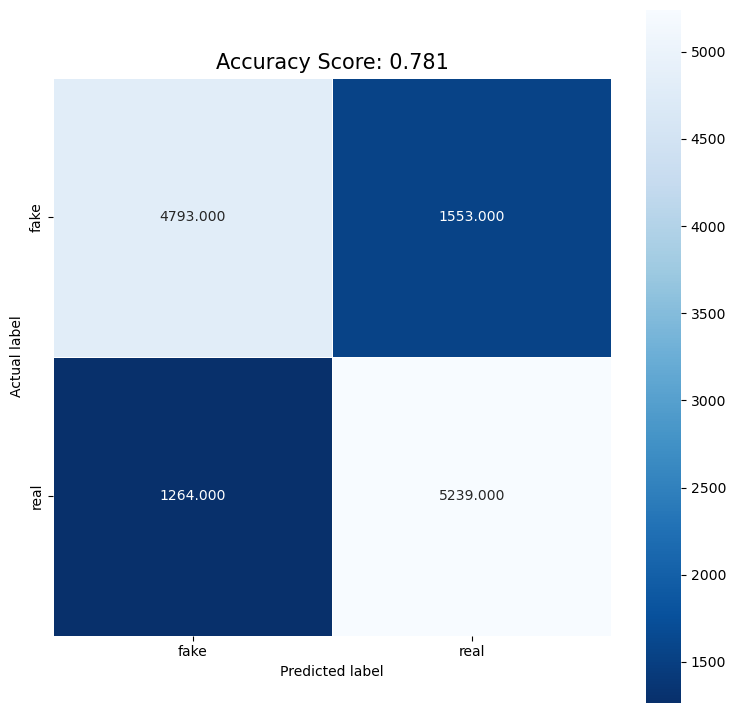

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=le.classes_, yticklabels=le.classes_);

print("Model [LogisticRegression]")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

## Q4.2: The second machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [16]:
# write your code here ^_^
lm = RandomForestClassifier()
lm.fit(X_train, y_train) 
score = lm.score(X_test, y_test)
score 

0.8993696007471399

In [17]:
pred = lm.predict(X_test) 
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[5359  987]
 [ 306 6197]]


Model [RandomForestClassifier]


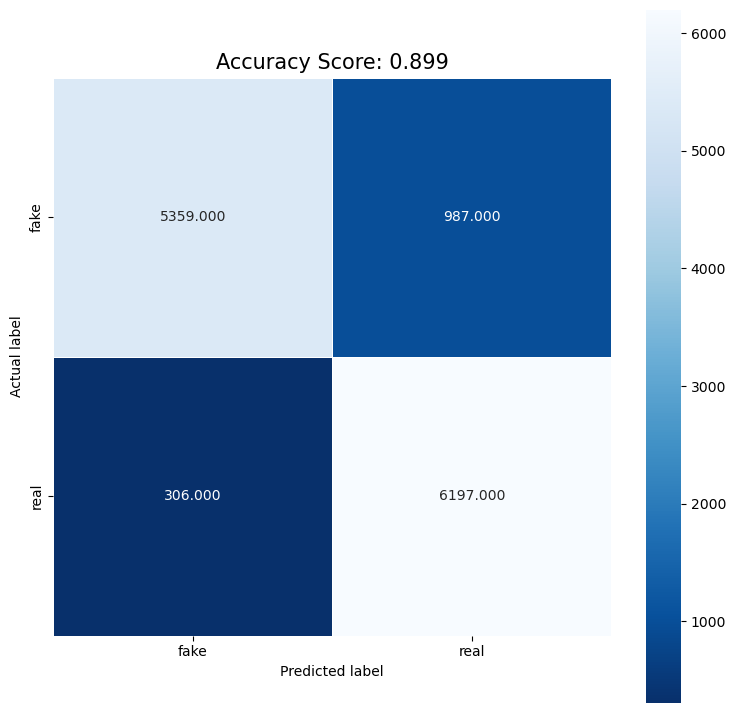

In [18]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=le.classes_, yticklabels=le.classes_);

print("Model [RandomForestClassifier]")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

## Q4.3: The third machine model
- Print the model's name.
- Print the model's accuracy.
- Print the model's confusion matrix.

In [19]:
# write your code here ^_^
lm = SVC()
lm.fit(X_train, y_train) 
score = lm.score(X_test, y_test)
score 

0.6916491555763095

In [20]:
pred = lm.predict(X_test) 
cm = metrics.confusion_matrix(y_test, pred)
print(cm)

[[3301 3045]
 [ 917 5586]]


Model [SVM Classifier]


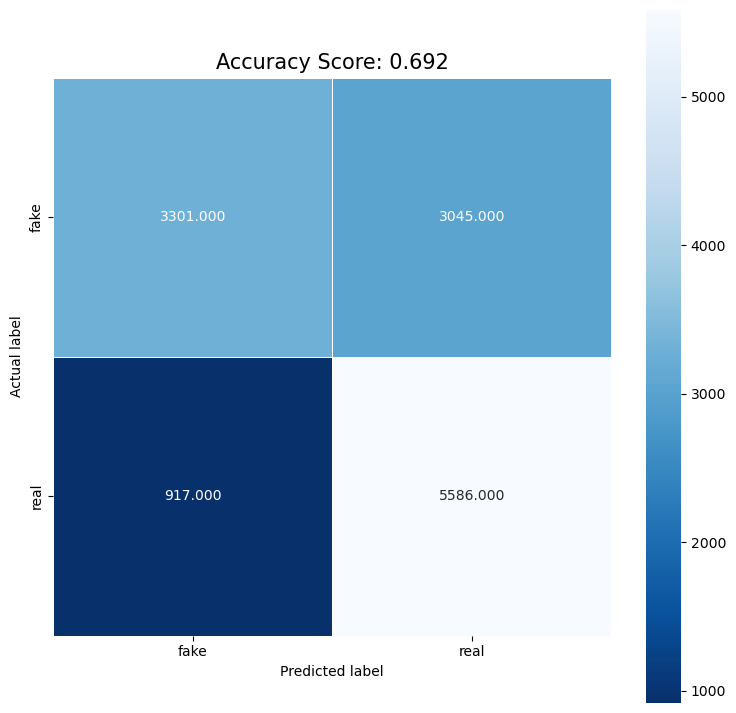

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', xticklabels=le.classes_, yticklabels=le.classes_);

print("Model [SVM Classifier]")
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 15);